# Stellar Flux
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  09/29/2023          |
| Updated |  10/20/2023          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} \equiv \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} \equiv \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$

## Stellar Properties

The luminosity $L = FA$, where $F$ is the flux and $A$ is the emission surface area.
For an emitting sphere with radius $R$, and $F = \sigma T^4$ (Rybicki & Lightman 1979, hereafter RL79, eq. 1.43),

$$
  L = \sigma T^4(4\pi R^2).
$$

In [40]:
import numpy as np

# athinput.stellar_flux
# <radiation>
prat         = 1.13e3              # $a_rT_0^4/P_0$
crat         = 6.36e4              # $c/v_0$
T_unit       = 6.14e3              # T_0 [K]
density_unit = 4.28e-14            # \rho_0 [g/cm^3]
length_unit  = 5.98e14             # L_0 [cm]

# <problem>
R            = 1.16e-4             # stellar radius [L_0]
T            = 9.42e-1             # stellar temperature [T_0]
# end athinput.stellar_flux

# physical constants
sigma = 5.7e-5                     # [erg/cm^2/s/K^4]
Lsun = 3.8e33                      # [erg/s]

A = 4*np.pi*(R*length_unit)**2     # stellar surface area [cm^2]
L = sigma*(T*T_unit)**4*A          # stellar luminosity

print(f'T = {T*T_unit} K')
print(f'L = {L/Lsun:.1f} Lsun')

T = 5783.88 K
L = 1.0 Lsun


## Analytic Solution

### Dust Density Profile

\begin{align*}
  \frac{P(r, \theta)}{r} &= \frac{P_0}{r_0}\left(\frac{r\sin\theta}{r_0}\right)^{-1/2} \\
  \rho_\mathrm{mid}(r, \theta) &= \rho_0\left(\frac{r\sin\theta}{r_0}\right)^{-9/4} \\
  \rho(r, \theta) &= \rho_\mathrm{mid}\exp\left[\frac{GMr}{P}\left(\frac{1}{\sqrt{r^2\sin^2\theta + r^2\cos^2\theta}} - \frac{1}{r\sin\theta}\right)\right] \\
                  &= \rho_\mathrm{mid}\exp\left[\frac{GM}{P}\left(1 - \frac{1}{\sin\theta}\right)\right] \\
\end{align*}

### Optical Depth, Specific Intensity, Radial Flux

From Rybicki & Lightman (1979), we define the *optical depth* along a ray in the radial direction $r$ at polar angle $\theta$ as
\begin{align*}
  \mathrm{d}\tau &\equiv \alpha\mathrm{d}r \\
  \tau(r, \theta) &= \int_{r_0}^r \alpha(r', \theta)\mathrm{d}r', \tag{1.26}
\end{align*}
where we define the *absorption coefficient* $[\mathsf{L}^{-1}]$ as
$$
\alpha(r, \theta) \equiv \rho\kappa_\mathrm{a},
\tag{1.22}
$$
for mass density $\rho(r, \theta)$ and *opacity* coefficient $\kappa_\mathrm{a}$ $[\mathsf{L}^2\mathsf{M}^{-1}]$.
With these, we can express the radiative transfer equation (1.23)—for absorption only—in terms of the optical depth as
$$
  \frac{\mathrm{d}I}{\mathrm{d}\tau} = -I
$$
with the solution
$$
  I(\tau) = I(0)e^{-\tau}.
$$
For *blackbody radiation* from an emitter at temperature $T$ (Rybicki & Lightman 1979, eq. 1.42)
$$
  I(0) = B(T) = \frac{a_\mathrm{r}c}{4\pi}T^4.
$$
If $x = r$ in spherical-polar coordinates, the radial flux (Rybicki & lightman 1979, p. 17) is then
\begin{align*}
  F_x &= \frac{1}{4\pi r^2} \int_\Omega I\mu_x\mathrm{d}\Omega \tag{cf. 1.3b} \\
  F_x &= \frac{I\mu_x}{r^2} \\ 
  F_x(\tau) &= \frac{a_\mathrm{r}c}{4\pi}\frac{T^4e^{-\tau}}{r^2} \\
  F_x(r, \theta) &= \frac{\mathbb{PC}T^{4}}{4\pi r^2}\exp\left[-\int_{r_\mathrm{min}}^r \kappa_\mathrm{a}\rho(r', \theta)\mathrm{d}r'\right].
\end{align*}

κ_a = 558.98169599999994 rho0*L_0


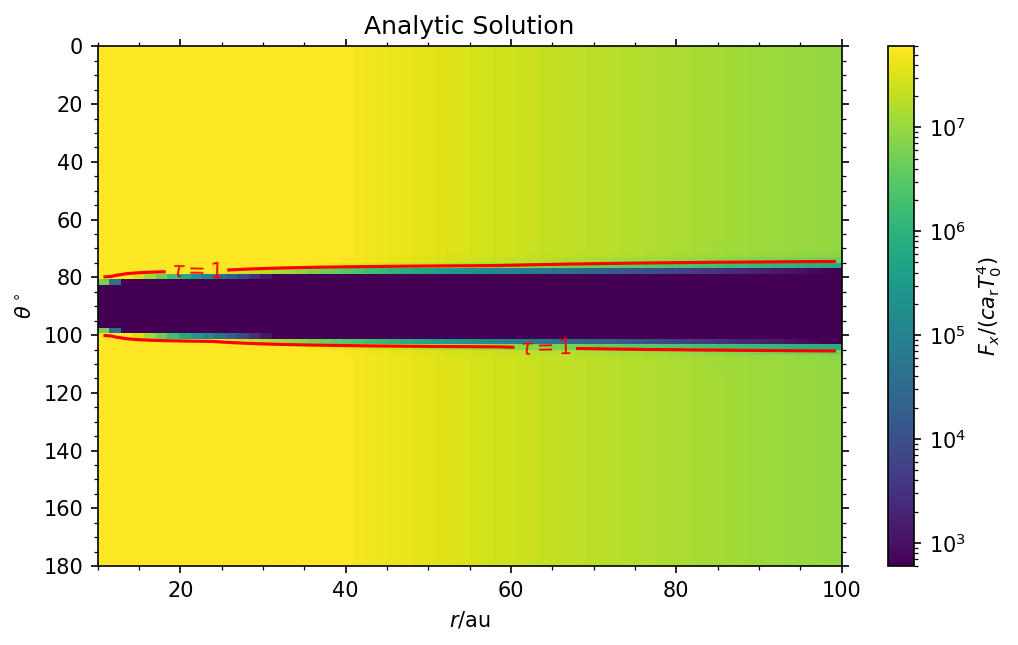

In [93]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# begin stellar_flux.cpp
# void Mesh::InitUserMeshData(ParameterInput *pin) {
# // Get parameters for gravitatonal potential of central point mass
gm0 = 1.0 # pin->GetOrAddReal("problem","GM",0.0);

# //---------------------------------------------------------------------------
# //! transform to cylindrical coordinate

def GetCylCoord(x1, x2, x3):
  rad = x1*np.sin(x2)
  phi = x3
  z = x1*np.cos(x2)
  return rad, phi, z

# //---------------------------------------------------------------------------
# //! computes density in cylindrical coordinates

def DenProfileCyl(x1, x2, x3):
  rad, phi, z, = GetCylCoord(x1, x2, x3)
  p_over_r = PoverR(rad, phi, z)
  denmid = rho0*np.power(rad/r0, dslope) #*np.exp(-r*np.sin(theta)/r0/r_c)
  dentem = denmid*np.exp(gm0/p_over_r*(1./np.sqrt(rad**2 + z**2) - 1./rad))
  den = dentem
  return den

# //----------------------------------------------------------------------------------------
# //! computes pressure/density in cylindrical coordinates

def PoverR(rad, phi, z):
  poverr = p0_over_r0*np.power(rad/r0, pslope)
  return poverr
# end stellar_flux.cpp

def fmt(x):
  return rf'$\tau={x:.0f}$'

# extra quantities
kappa_star_cgs    = 10             # [cm^2/g]
dgratio           = 100            # dust-to-gas ratio
small_grain_ratio = 0.02184

# begin athinput.stellar_flux
# <mesh>
nx1          = 64                  # Number of zones in X1-direction
x1min        = 0.250163663377926   # minimum value of X1
x1max        = 2.501636633779264   # maximum value of X1

nx2          = 96                  # Number of zones in X2-direction
x2min        = 0                   # minimum value of X2
x2max        = 3.141592653589793   # maximum value of X2

# <hydro>
dfloor       = 1e-12               # minimum density

# <radiation>
prat         = 1.13e3              # $a_rT_0^4/P_0$
crat         = 6.36e4              # $c/v_0$
unit         = 1                   # adopt the units in the input file
T_unit       = 6.14e3              # T_0 [K]
density_unit = 4.28e-14            # \rho_0 [g/cm^3]
length_unit  = 5.98e14             # L_0 [cm]

# <problem>
r0           = 1.0                 # radial normalization 
rho0         = 1.0                 # [\rho_0]
p0_over_r0   = 4.80e-03
pslope       = -0.5                # pressure power-law index
dslope       = -2.25               # density power-law index
kappa_star = kappa_star_cgs*dgratio*small_grain_ratio*density_unit*length_unit
kappa_a      = kappa_star          # absorption opacity
R            = 1.16e-4             # stellar radius [L_0]
T            = 9.42e-1             # stellar temperature [T_0]
# end athinput.stellar_flux

print(f'κ_a = {kappa_a:.14f} rho0*L_0')

x1f, x2f = np.linspace(x1min, x1max, nx1+1), np.linspace(x2min, x2max, nx2+1)
x1v, x2v = (x1f[:-1] + x1f[1:])/2, (x2f[:-1] + x2f[1:])/2
x1mesh, x2mesh = np.meshgrid(x1v, x2v)
rho_field = DenProfileCyl(x1mesh, x2mesh, 0)
rho_field[rho_field < dfloor] = dfloor
dr = (x1max - x1min)/nx1
dtau = rho_field*kappa_a*dr
tau_field  = np.cumsum(dtau, axis=1)
F = prat*crat*T**4*(np.exp(-tau_field))/x1v**2#/4/np.pi

# conversions
au           = 1.495978707e13      # [cm]
L_au         = length_unit/au      # [au]
rad2deg      = 180/np.pi

# Plot and format
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)
vmin, vmax = 6e2, 6e7
clip = np.clip(F, vmin, vmax)
im = ax.pcolormesh(x1v*L_au, x2v*rad2deg, clip, norm=colors.LogNorm())
CS = ax.contour(x1v*L_au, x2v*rad2deg, tau_field, [1, 1e4],
                 colors=['red', 'white'])
cb_F = plt.colorbar(im, label='$F_x/(ca_\mathrm{r}T_0^4)$')

ax.clabel(CS, CS.levels, fmt=fmt)
ax.invert_yaxis()
ax.minorticks_on()
ax.set(xlabel='$r$/au', ylabel=r'$\theta^\circ$')
ax.set_title(f'Analytic Solution')
ax.tick_params(axis='both', which='both', top=True, right=True)


## Athena++

### Adjusted Intensity

In code units, the Stefan–Botlzmann constant is

\begin{align*}
  \sigma &\equiv \frac{a_\mathrm{r}c}{4} \tag{RL79 1.44a} \\
         &= \frac{\mathbb{P} P_0 \mathbb{C} v_0}{4T_0^4} \\
         &= \frac{\mathbb{P}\mathbb{C}}{4} \\
\end{align*}

### Iterative Convergence

/home/stanley/github/PrincetonUniversity/athena/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


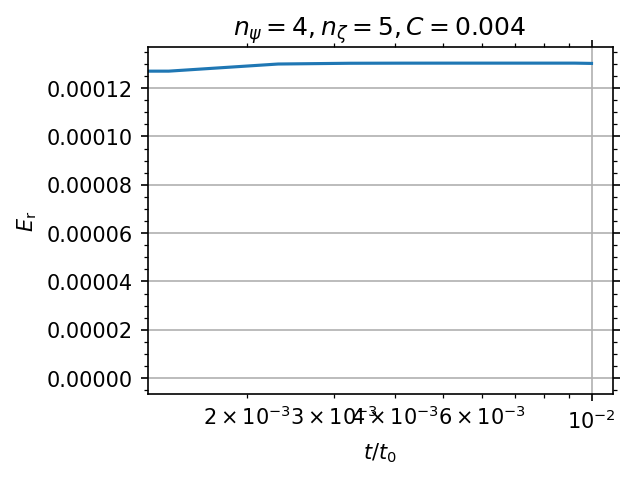

In [37]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt

problem_id = 'stellar_flux'
npsi = 4
nzeta = 5
error_limit = '1e-6'
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

# Read and plot
path = f'npsi{npsi}/nzeta{nzeta}-e_l{error_limit}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
cfl_number = athinput['time']['cfl_number']
hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
time, Er = hst['time'], hst['Er']

ax.plot(time, Er)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel='$t/t_0$', ylabel=r'$E_\mathrm{r}$', xscale='log',
       title=f'$n_\psi={npsi}, n_\zeta={nzeta}, C={cfl_number}$',)
       # ylim=(1.298e-4, 1.31e-4))
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig(f'{path}/temp/E_tot(t)_C{cfl_number:.0e}.jpg', bbox_inches='tight',
            pad_inches=0.01)

t=0.01t_0 took 00:03:18


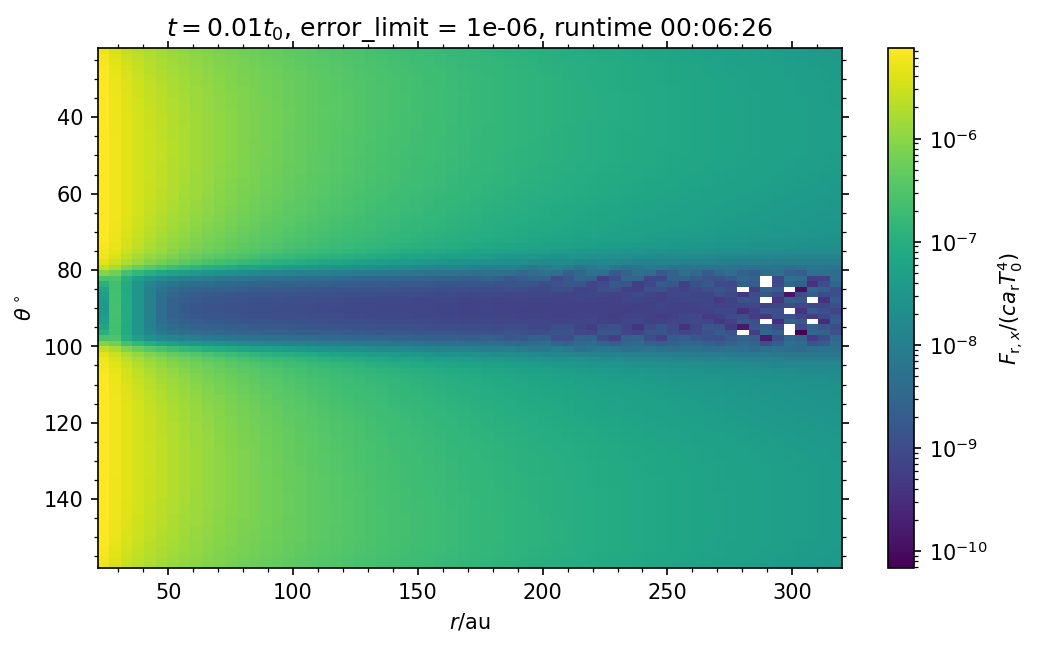

In [38]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# conversions
length_unit  = 5.98e14             # L_0 [cm]
au = 1.495978707e13                # [cm]
Lau = length_unit/au
rad2deg = 180/np.pi

problem_id = 'stellar_flux'
npsi = 4
nzeta = 5
error_limit = '1e-6'
i_out = 1
vmin, vmax = 7e-7, 0.7
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)

# Read and plot
path = f'npsi{npsi}/nzeta{nzeta}-e_l{error_limit}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
error_limit = athinput['radiation']['error_limit']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{i_out:05d}.athdf')
t = athdf['Time']
# clip = np.clip(athdf['Fr1'][0], vmin, vmax)
clip = athdf['Fr1'][0]
Fr1 = ax.pcolormesh(athdf['x1v']*Lau, athdf['x2v']*rad2deg, clip,
                    norm=colors.LogNorm())

# Format (sub)plots
cb_Fr1 = plt.colorbar(Fr1, label='$F_{\mathrm{r},x}/(ca_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$t={t:.2f}t_0$, error_limit = {error_limit:.0e}, runtime 00:06:26')
ax.set(xlabel='$r$/au', ylabel=r'$\theta^\circ$')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.gca().invert_yaxis()
plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

print(f't={t:.2f}t_0 took 00:03:18')

### Angular Resolution Study

x1min = 0.54L_0 = 22au
  r_1 = 1.54L_0 = 62au
  dx1 = 0.1165625L_0
 i_r1 = 8


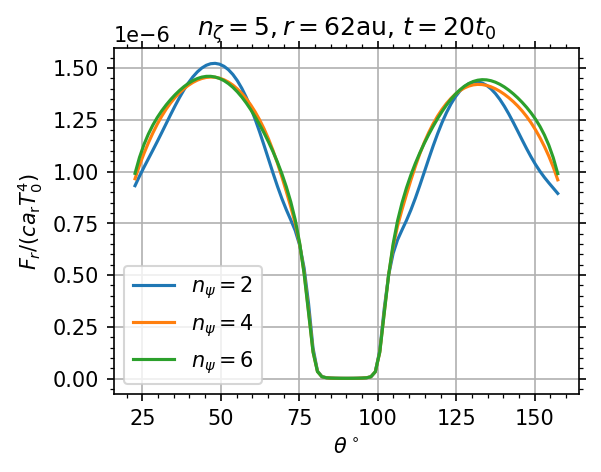

In [74]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

# conversions
length_unit  = 5.98e14             # L_0 [cm]
au = 1.495978707e13                # [cm]
Lau = length_unit/au
rad2deg = 180/np.pi

problem_id = 'stellar_flux'
npsis = [2, 4, 6]
nzeta = 5
i_out = 2
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

# Read and plot
for npsi in npsis:
    path = f'{problem_id}/npsi{npsi}/nzeta{nzeta}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    x1min = athinput['mesh']['x1min']
    dx1 = (athinput['mesh']['x1max'] - x1min)/athinput['mesh']['nx1']
    i_r1 = int(1/dx1)
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{i_out:05d}.athdf')
    t = athdf['Time']
    ax.plot(athdf['x2v']*rad2deg, athdf['Fr1'][0, :, i_r1],
            label=f'$n_\psi={npsi}$')

# Format (sub)plots
ax.grid()
ax.legend()
ax.minorticks_on()
ax.set_title(f'$n_\zeta={nzeta}, r={(x1min + 1)*Lau:.0f}$au, $t={t:.0f}t_0$')
ax.set(xlabel=r'$\theta^\circ$', ylabel='$F_r/(ca_\mathrm{r}T_0^4)$')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('figs/frame.jpg', bbox_inches='tight')

print(f'x1min = {x1min}L_0 = {x1min*Lau:.0f}au')
print(f'  r_1 = {x1min+1}L_0 = {(x1min+1)*Lau:.0f}au')
print(f'  dx1 = {dx1}L_0')
print(f' i_r1 = {i_r1}')


x1min = 0.54L_0 = 22au
  r_1 = 1.54L_0 = 62au
  dx1 = 0.1165625L_0
 i_r1 = 8


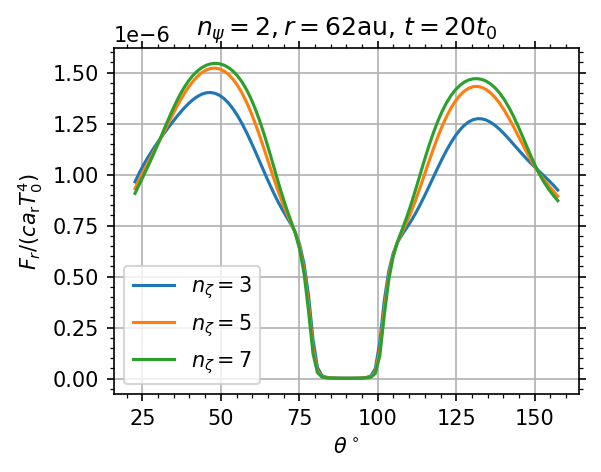

In [77]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

# conversions
length_unit  = 5.98e14             # L_0 [cm]
au = 1.495978707e13                # [cm]
Lau = length_unit/au
rad2deg = 180/np.pi

problem_id = 'stellar_flux'
npsi = 2
nzetas = [3, 5, 7]
i_out = 2
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

# Read and plot
for nzeta in nzetas:
    path = f'{problem_id}/npsi{npsi}/nzeta{nzeta}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    x1min = athinput['mesh']['x1min']
    dx1 = (athinput['mesh']['x1max'] - x1min)/athinput['mesh']['nx1']
    i_r1 = int(1/dx1)
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{i_out:05d}.athdf')
    t = athdf['Time']
    ax.plot(athdf['x2v']*rad2deg, athdf['Fr1'][0, :, i_r1],
            label=f'$n_\zeta={nzeta}$')

# Format (sub)plots
ax.grid()
ax.legend()
ax.minorticks_on()
ax.set_title(f'$n_\psi={npsi}, r={(x1min + 1)*Lau:.0f}$au, $t={t:.0f}t_0$')
ax.set(xlabel=r'$\theta^\circ$', ylabel='$F_r/(ca_\mathrm{r}T_0^4)$')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('figs/frame.jpg', bbox_inches='tight')

print(f'x1min = {x1min}L_0 = {x1min*Lau:.0f}au')
print(f'  r_1 = {x1min+1}L_0 = {(x1min+1)*Lau:.0f}au')
print(f'  dx1 = {dx1}L_0')
print(f' i_r1 = {i_r1}')
